In [ ]:
%pip install mne

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
import math 

In [4]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}


In [5]:
channels = pd.DataFrame(chs).transpose()
channels


,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [6]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

/var/folders/g9/s_fx5qk126515rbzxjm9x6ww0000gn/T/ipykernel_3141/2461572216.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


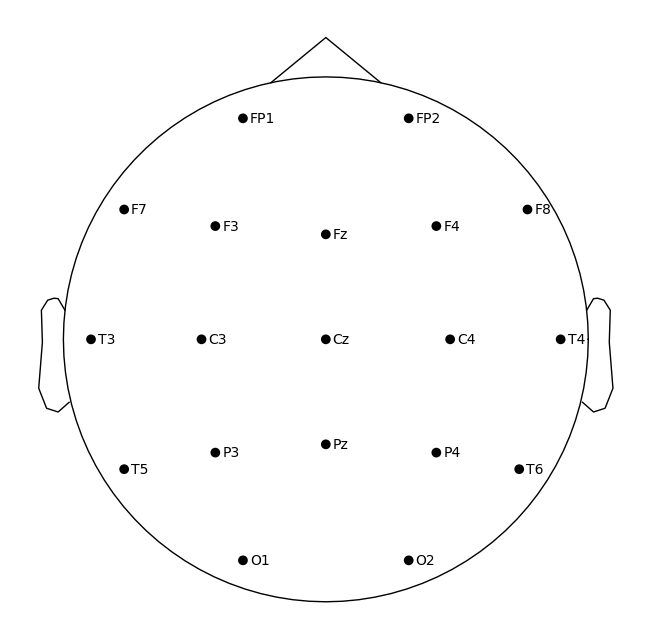

In [7]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()

In [8]:
df = pd.read_csv('../Datasets/EEG_data_BRMH.csv')
df

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [9]:
mis = df.isna().sum()
separator = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':separator].drop(separator, axis=1)
df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [10]:
def reformat_name(name):
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2], reformat_vect(df.columns[2:])))
df=df.set_axis(new_colnames, axis=1)
df.columns

Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)

In [11]:
# Select only numeric columns for mean calculation
main_mean = df.groupby('main.disorder').mean(numeric_only=True).reset_index()
spec_mean = df.groupby('specific.disorder').mean(numeric_only=True).reset_index()

# List of bands (assuming they are present in the DataFrame as column names)
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

# Convert from wide to long format
main_mean = pd.wide_to_long(main_mean, stubnames=bands, i='main.disorder', j='channel', sep='.', suffix='\w+')
spec_mean = pd.wide_to_long(spec_mean, stubnames=bands, i='specific.disorder', j='channel', sep='.', suffix='\w+')

main_mean


,,delta,theta,alpha,beta,highbeta,gamma
main.disorder,channel,,,,,,
Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...
Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698


## Visualization

In [12]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap=None, cb_pos=(0.9, 0.1), vmin=None,vmax=None,
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, **kwargs):
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names,
                          cmap=cmap, mask=mask, mask_params=marker_style, vlim=(vmin,vmax),show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [13]:
def plot_eeg_dataset(dataset, channels, gwidth=2, gheight=1.5, wspace=0,
                     marker_style={'markersize': 2, 'markerfacecolor': 'black'},
                     band_ordered=None, conditions_ordered=None, band_labels=None,
                     condition_labels=None, cmap=None, **kwargs):
    if band_ordered is None:
        band_ordered = dataset.columns
    if conditions_ordered is None:
        conditions_ordered = dataset.index.get_level_values(0).unique()
    if band_labels is None:
        band_labels = band_ordered
    if condition_labels is None:
        condition_labels = conditions_ordered
    # number of rows in figure
    nrows = len(band_ordered)
    # number of columns in figure
    ncols = len(conditions_ordered)
    # create figure with width gwidth and gheight per graph
    fig = plt.figure(constrained_layout=True, figsize=(gwidth*ncols, gheight*nrows))
    # create subfigures
    subfigs = fig.subfigures(nrows, ncols, wspace=wspace)
    # loop through subfigures
    for ind, subfig in np.ndenumerate(subfigs):
        i, j = ind
        # select band (column name in main_mean)
        band = band_ordered[i]
        # select disorder (row name in main_mean)
        disorder = conditions_ordered[j]
        # select band levels for disorder
        levels = dataset.loc[disorder, band]
        # create axes
        ax = subfig.subplots()
        vmin=0
        vmax = math.ceil(max(dataset[band]))
        # plot eeg
        plot_eeg(levels, channels.to_numpy(), ax, subfig, marker_style=marker_style, cmap=cmap,vmin=vmin,vmax=vmax, **kwargs)
        # annotate band (if needed)
        if j == 0:
            ax.set_ylabel(band_labels[i])
        # annotate disorder (if needed)
        if i == 0:
            subfig.suptitle(condition_labels[j], y=1.3)
    return fig, subfigs

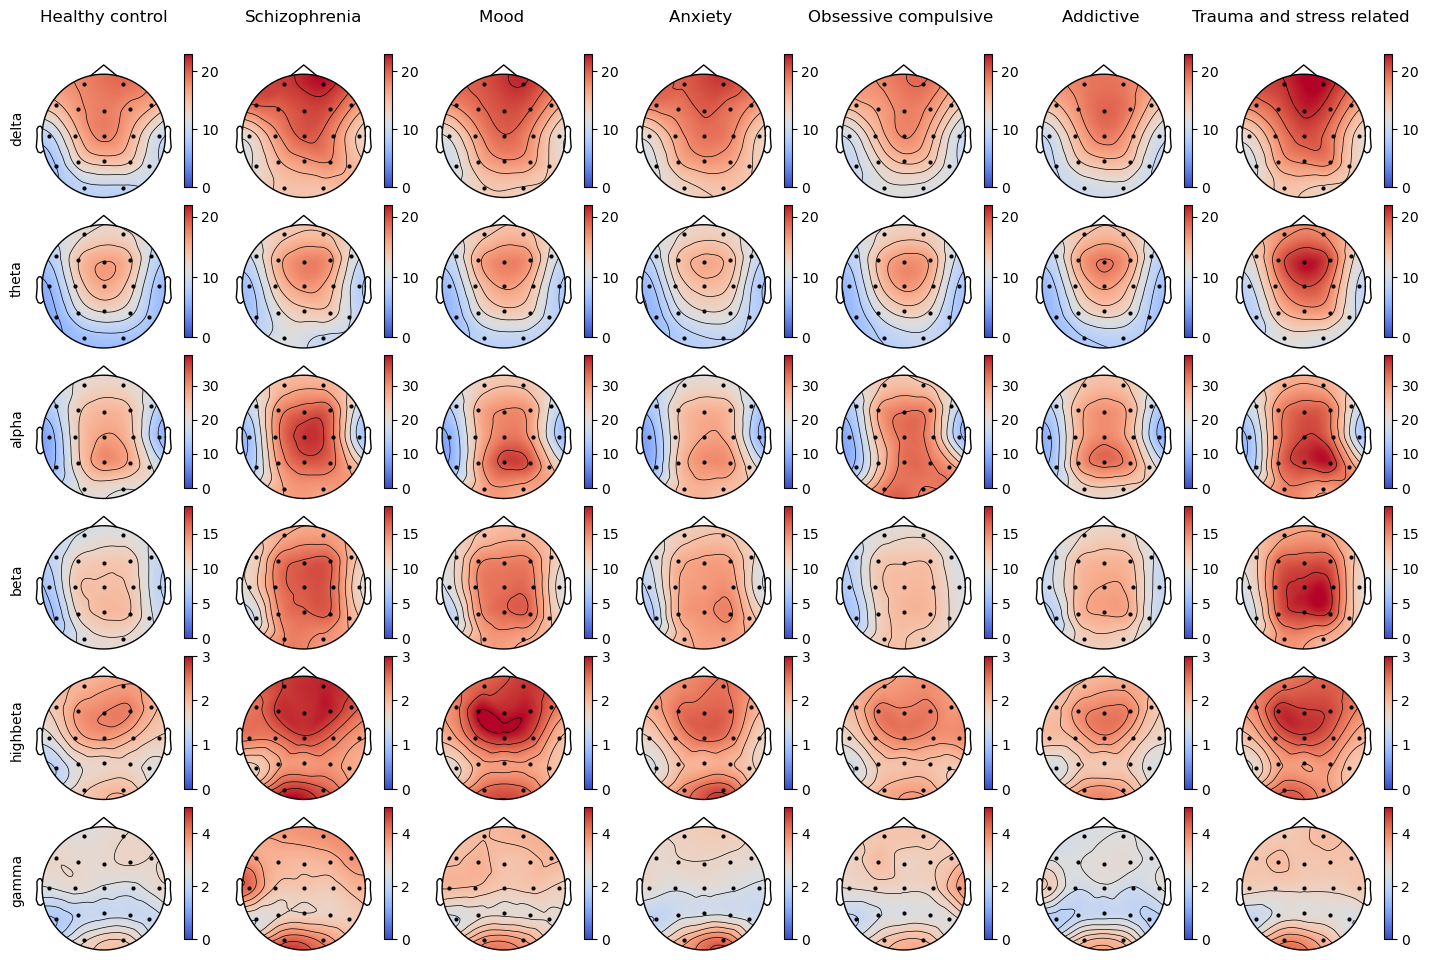

In [14]:
# order conditions (main.disorder)
conds = ['Healthy control',
         'Schizophrenia', 
         'Mood disorder', 
         'Anxiety disorder',  
         'Obsessive compulsive disorder', 
         'Addictive disorder',
         'Trauma and stress related disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(main_mean, channels, cmap='coolwarm', conditions_ordered=conds, condition_labels=conds_labs)
plt.show()

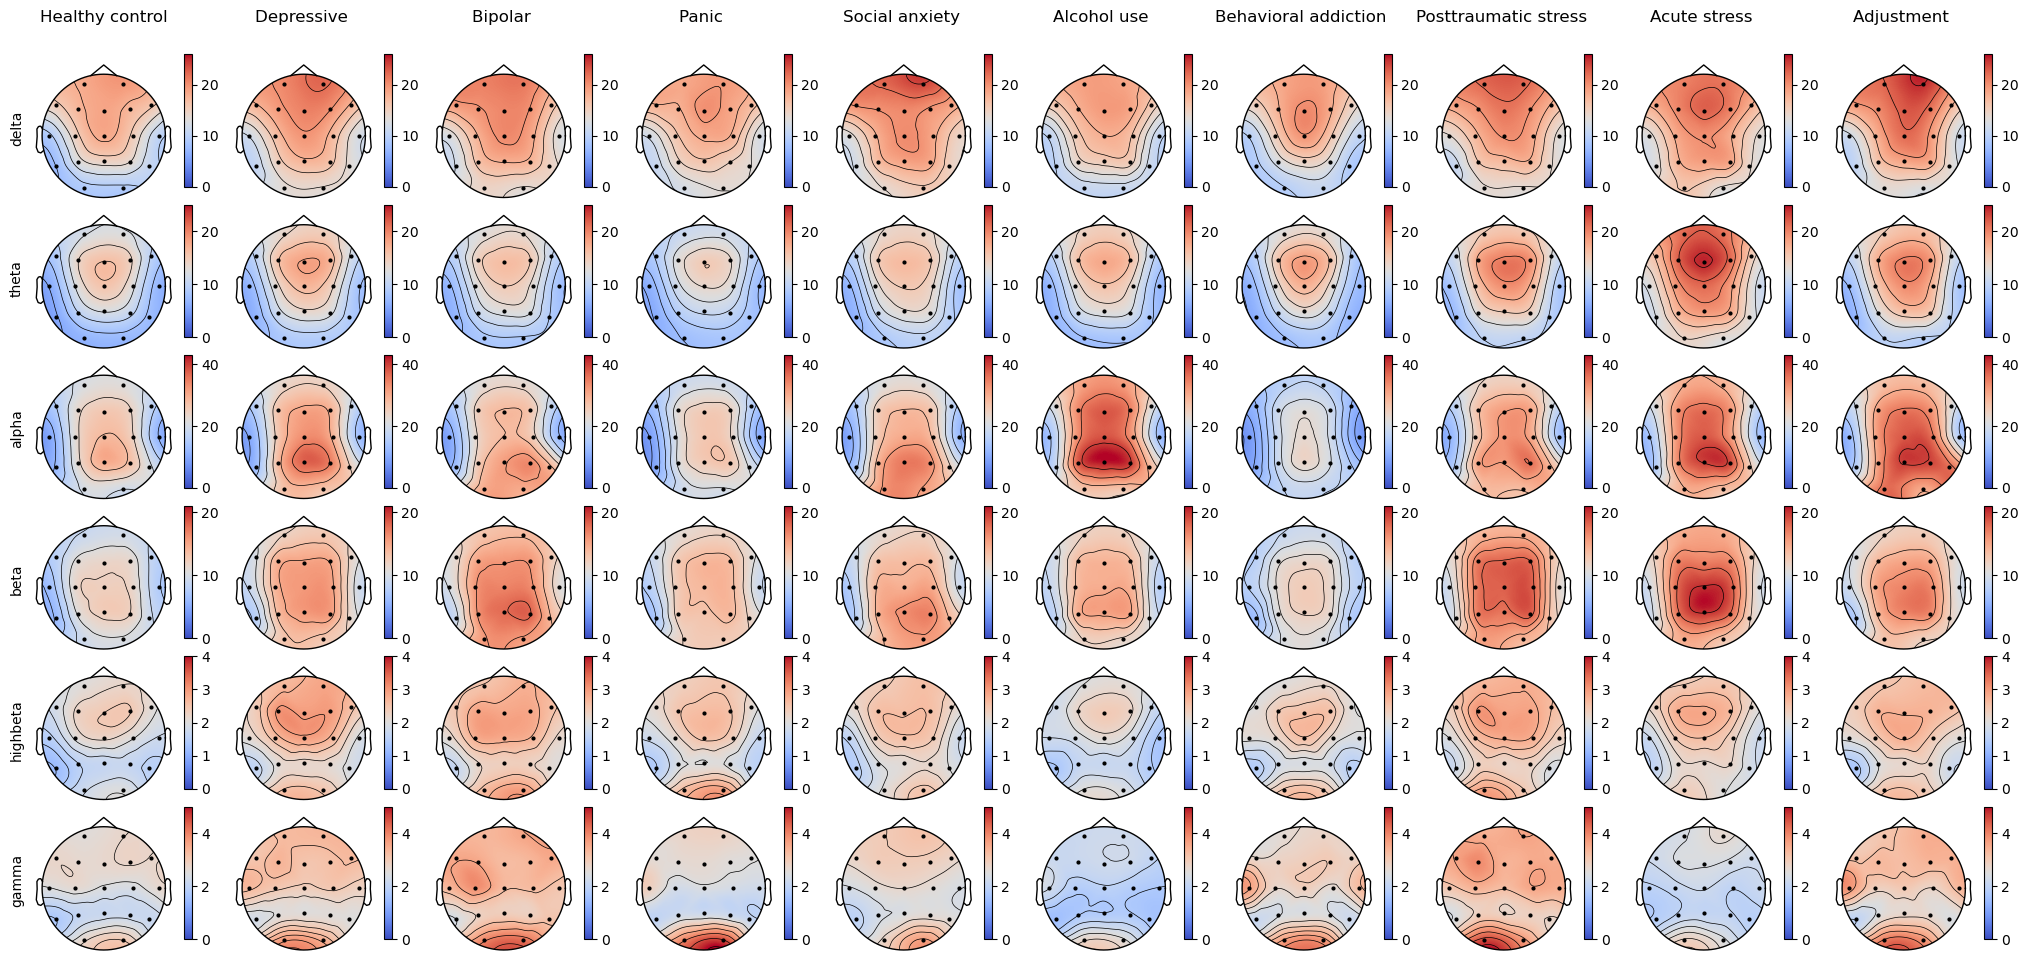

In [15]:
conds = ['Healthy control', 
         'Depressive disorder', 
         'Bipolar disorder',
         'Panic disorder',
         'Social anxiety disorder',
         'Alcohol use disorder',
         'Behavioral addiction disorder',
         'Posttraumatic stress disorder',
         'Acute stress disorder', 
         'Adjustment disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(spec_mean, channels, cmap='coolwarm',conditions_ordered=conds, condition_labels=conds_labs)
plt.show()

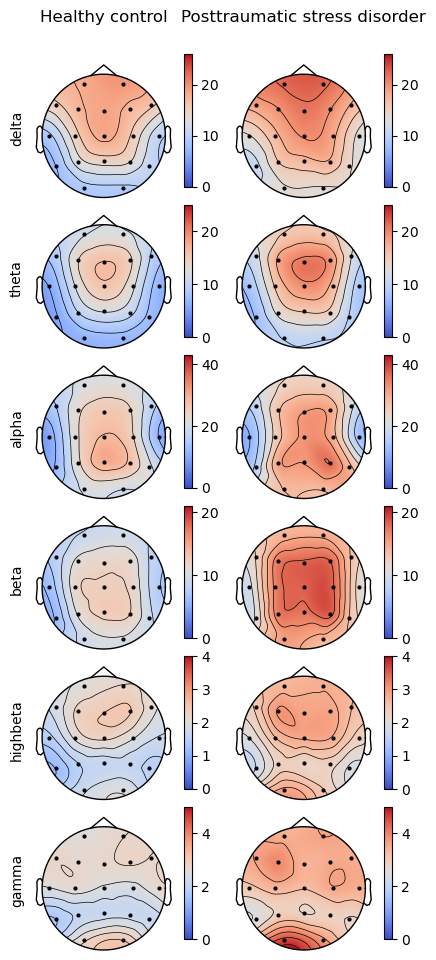

In [16]:
conds = ['Healthy control', 
         'Posttraumatic stress disorder']
plot_eeg_dataset(spec_mean, channels, cmap='coolwarm', conditions_ordered=conds)
plt.show()

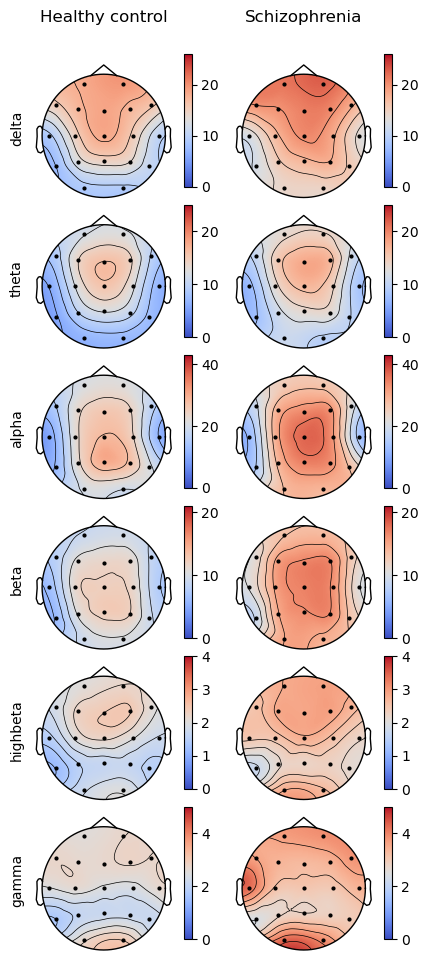

In [17]:
conds = ['Healthy control', 
         'Schizophrenia']
plot_eeg_dataset(spec_mean, channels, cmap='coolwarm', conditions_ordered=conds)
plt.show()